In [164]:
import pandas as pd
import pylab as plt
import statsmodels.formula as smf
import numpy as np
import geopandas as gpd
import scipy.stats


%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
zones = gpd.read_file('neighborhood_slow_zones.json')

In [3]:
data1 = gpd.read_file('injury_yearly.json')

In [4]:
data1.head()

,BikeInjuri,Injuries,MVOInjurie,PedInjurie,YR,geometry
0,0,1,1,0,2009,POINT (-73.97336342934064 40.57477366516045)
1,0,1,1,0,2009,POINT (-73.92987364834694 40.66399077159335)
2,0,1,1,0,2009,POINT (-73.81406539062687 40.77155395852282)
3,0,5,5,0,2009,POINT (-73.97054554425758 40.64531666666421)
4,0,1,1,0,2009,POINT (-73.77712347016703 40.71426199318778)


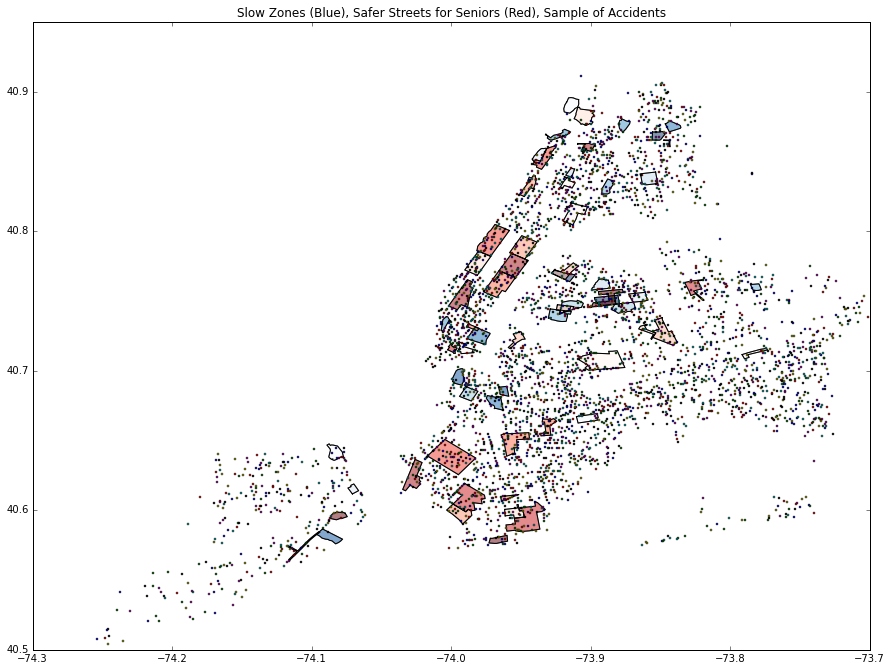

In [373]:
plt.figure(figsize=(15,15))
zones.plot(colormap='Blues')
seniors.plot(colormap='Reds')
data1[0:4000].plot()
plt.title('Slow Zones (Blue), Safer Streets for Seniors (Red), Sample of Accidents')

In [5]:
def withinslowzone(pt):
    try:
        if zones['geometry'].contains(pt).sum() >=1:
            return True
        else:
            return False
    except AttributeError:
        return False

In [10]:
data1['inzone'] = data1['geometry'].apply(withinslowzone)

In [38]:
data1[data1['inzone']==True]

,BikeInjuri,Injuries,MVOInjurie,PedInjurie,YR,geometry,inzone,whichzone,zyear,whichseniorzone,syear
26,0,3,2,1,2009,POINT (-73.89150522873103 40.74723844334931),True,Jackson Heights SZ,2014,Jackson Heights,2012
58,0,4,2,2,2009,POINT (-73.86277362966251 40.84038107015688),True,Parkchester SZ,2015,,NaN
111,0,3,1,2,2009,POINT (-73.86393748064827 40.84004456446758),True,Parkchester SZ,2015,,NaN
112,1,1,0,0,2009,POINT (-73.86790637587161 40.75415116670563),True,Corona SZ,2012,,NaN
137,0,4,3,1,2009,POINT (-73.87790382855566 40.74558969620305),True,Elmhurst SZ,2013,,NaN
139,1,1,0,0,2009,POINT (-73.87715872447686 40.74686503073819),True,Elmhurst SZ,2013,,NaN
145,0,1,0,1,2009,POINT (-73.88375272654706 40.75188505849601),True,Jackson Heights SZ,2014,Jackson Heights,2012
170,0,1,0,1,2009,POINT (-73.9346267766096 40.85450145455474),True,Hudson Heights SZ,2015,,NaN
176,0,2,1,1,2009,POINT (-73.85289096002947 40.86538786515442),True,Eastchester SZ,2013,,NaN
187,0,1,1,0,2009,POINT (-73.88485538547515 40.74753481011037),True,Jackson Heights SZ,2014,Jackson Heights,2012


In [15]:
def whichzone(pt):
    try:
        return (zones['Name']*zones['geometry'].contains(pt).astype(int)).max()
    except AttributeError:
        return None

In [16]:
data1['whichzone'] = data1['geometry'].apply(whichzone)

In [26]:
def zoneyear(name):
    try:
        return zones.loc[name]['Year']
    except (KeyError, ValueError):
        return None
    
zones.index = zones['Name']

In [27]:
data1['zyear'] = data1['whichzone'].apply(zoneyear)

In [29]:
seniors = gpd.read_file('safe_streets_for_seniors.json')

In [30]:
def withinseniorzone(pt):
    try:
        if seniors['geometry'].contains(pt).sum() >=1:
            return True
        else:
            return False
    except AttributeError:
        return False

In [31]:
def whichseniorzone(pt):
    try:
        return (seniors['Name']*seniors['geometry'].contains(pt).astype(int)).max()
    except AttributeError:
        return None

In [32]:
data1['whichseniorzone'] = data1['geometry'].apply(whichseniorzone)

In [33]:
seniors.index = seniors['Name']

In [35]:
def seniorzoneyear(name):
    try:
        return seniors.loc[name]['Year']
    except (KeyError, ValueError):
        return None

In [37]:
data1['syear'] = data1['whichseniorzone'].apply(seniorzoneyear)

In [67]:
data1['YR'] = data1['YR'].astype(float)

In [70]:
data1 = data1[data1['YR']<2016]

In [71]:
dinzone = data1[(data1['zyear'].apply(lambda x: not isnan(x)) | data1['syear'].apply(lambda x: not isnan(x)))]

In [72]:
dinzone['abeforez'] = (dinzone['YR'] < dinzone['zyear'])
dinzone['aafterz'] = (dinzone['YR'] > dinzone['zyear'])
dinzone['abefores'] = (dinzone['YR'] < dinzone['syear'])
dinzone['aafters'] = (dinzone['YR'] > dinzone['syear'])

/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [84]:
dinzone['ibeforez'] = dinzone['Injuries']*(dinzone['YR'] < dinzone['zyear'])
dinzone['iafterz'] = dinzone['Injuries']*(dinzone['YR'] > dinzone['zyear'])
dinzone['ibefores'] = dinzone['Injuries']*(dinzone['YR'] < dinzone['syear'])
dinzone['iafters'] = dinzone['Injuries']*(dinzone['YR'] > dinzone['syear'])

/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [229]:
#dinzone

In [192]:
gdinzonz = dinzone.groupby('whichzone')

In [284]:
gz = gdinzonz.sum()

In [171]:
def proptest(ph,p0,n):
    z = (ph - p0) / np.sqrt(p0*(1-p0)/n)
    pvalue = 1 - scipy.stats.norm.cdf(z)
    return pvalue

In [285]:
gz['Name'] = gz.index

In [286]:
gz = gz.merge(zones)

In [297]:
def yearsbefore(year):
    if year <=2014:
        return year - 2009
    else:
        return 5

In [298]:
gz['yrsbefore'] = gz['Year'].apply(yearsbefore)

In [301]:
def yearsafter(year):
    if year >= 2014:
        return 2015 - year
    else:
        return 2014 - year

In [302]:
gz['yrsafter'] = gz['Year'].apply(yearsafter)

In [303]:
#gz['yrsbefore'] = gz['Year'] - 2009

In [304]:
#gz['yrsafter'] = 2015 - gz['Year']

In [305]:
#injuries per year before
gz['ipyb'] = gz['ibeforez'].astype(float)/gz['yrsbefore']
gz['ipya'] = gz['iafterz'].astype(float)/gz['yrsafter']

In [306]:
gz = gz[gz['Year']<2015]

In [307]:
gz['decrease'] = gz['ipyb'] > gz['ipya']

/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [309]:
#gz

In [310]:
mean(gz['ipya'].astype(float) / gz['ipyb'])

0.7536787467561796

In [340]:
std(gz['ipya'].astype(float) / gz['ipyb'])

0.13153481686068935

In [311]:
gz['decrease'].sum()

19

In [312]:
proptest(1,0.5,19)

6.5359226834038608e-06

In [313]:
gdinzons = dinzone.groupby('whichseniorzone')

In [314]:
gs = gdinzons.sum()

In [315]:
gs['Name'] = gs.index

In [316]:
gs = gs.merge(seniors)

In [317]:
gs = gs[gs['Year']<2015]
gs = gs[gs['Year']>2009]

In [318]:
gs['yrsbefore'] = gs['Year'].apply(yearsbefore)

In [319]:
gs['yrsafter'] = gs['Year'].apply(yearsafter)

In [320]:
gs['ipyb'] = gs['ibefores'].astype(float)/gs['yrsbefore']
gs['ipya'] = gs['iafters'].astype(float)/gs['yrsafter']

In [321]:
gs['decrease'] = gs['ipyb'] > gs['ipya']

In [323]:
mean(gs['ipya'].astype(float) / gs['ipyb'])

0.8786171606475421

In [342]:
gs['decrease'].sum()/37.

0.6216216216216216

In [329]:
proptest(0.6216216216216216,0.5,37)

0.069491230146592753

In [330]:
dnotinzone = data1[(data1['zyear'].apply(lambda x: isnan(x)) & data1['syear'].apply(lambda x: isnan(x)))]

In [331]:
gdnotinzone = dnotinzone.groupby('YR')

In [332]:
gdnotinzone.sum()

,BikeInjuri,Injuries,MVOInjurie,PedInjurie,inzone,zyear,syear
YR,,,,,,,
2009,2395,39038,27995,8648,False,NaN,NaN
2010,2999,40744,28915,8830,False,NaN,NaN
2011,2826,37843,26399,8618,False,NaN,NaN
2012,2865,37339,26178,8296,False,NaN,NaN
2013,3012,38169,26506,8651,False,NaN,NaN
2014,0,0,0,0,False,NaN,NaN
2015,3127,33372,23454,6791,False,NaN,NaN


In [346]:
33372./39038

0.8548593677954813

In [352]:
gs['percent'] = gs['ipya'].astype(float) / gs['ipyb']
gz['percent'] = gz['ipya'].astype(float) / gz['ipyb']

/Users/michaelevans/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [361]:
gs['percent'].mean()

0.8786171606475421

In [364]:
gz['percent'].mean()

0.7536787467561796

In [357]:
scipy.stats.ttest_1samp(gz['percent'],0.8548593677954813)

Ttest_1sampResult(statistic=-3.263569523375617, pvalue=0.0043144487677477059)

In [358]:
scipy.stats.ttest_1samp(gs['percent'],0.8548593677954813)

Ttest_1sampResult(statistic=1.1850334895593209, pvalue=0.24672320331455599)

In [335]:
gs

,BikeInjuri,Injuries,MVOInjurie,PedInjurie,YR,inzone,zyear,syear,abeforez,aafterz,...,Name,Shape_Area,Shape_Leng,Year,geometry,yrsbefore,yrsafter,ipyb,ipya,decrease
0,57,659,468,134,460724,83,167245,460748,72,0,...,Astoria,8442291.80346,14813.446198,2012,POLYGON ((-73.90891021055585 40.77491295561874...,3,2,116.666667,108.500000,True
1,33,599,411,155,513051,0,NaN,513315,0,0,...,Bath Beach,12012878.27270,15708.096316,2013,POLYGON ((-73.99849613667449 40.60446236161115...,4,1,104.500000,92.000000,True
2,61,758,385,312,657914,0,NaN,658251,0,0,...,Bay Ridge,14889419.17630,21614.498034,2013,"POLYGON ((-74.02605073675574 40.6357479830684,...",4,1,129.250000,103.000000,True
3,136,1446,813,497,1406335,0,NaN,1404990,0,0,...,Bensonhurst,25732717.01950,24341.611135,2010,(POLYGON ((-73.99853517914805 40.6044529462586...,1,4,252.000000,232.750000,True
4,332,2464,1087,1045,2547105,0,NaN,2544660,0,0,...,Borough Park,43453336.48660,26764.310988,2010,POLYGON ((-73.99471002480266 40.62555910615749...,1,4,460.000000,401.000000,True
6,56,488,226,206,307846,0,NaN,307530,0,0,...,Chinatown,2302796.04194,7493.268132,2010,POLYGON ((-74.00242962619119 40.71507811914329...,1,4,79.000000,82.500000,False
7,25,582,365,192,370212,0,NaN,369840,0,0,...,East Concourse,4290879.19718,11431.888862,2010,POLYGON ((-73.91692277848459 40.83846786094952...,1,4,98.000000,97.750000,True
8,87,1286,957,242,599538,0,NaN,598980,0,0,...,East Flatbush,6543494.19922,15364.295155,2010,POLYGON ((-73.93435044901615 40.66547614516255...,1,4,253.000000,197.000000,True
9,142,1181,625,414,917434,0,NaN,917472,0,0,...,East Harlem,17414513.98150,16986.428948,2012,"POLYGON ((-73.9470833761013 40.78015158109071,...",3,2,207.000000,172.000000,True
10,178,2177,1440,559,921467,0,NaN,921496,0,0,...,Flatbush,17243002.20820,21905.230002,2012,POLYGON ((-73.95428061168451 40.64058938449827...,3,2,396.000000,316.000000,True


In [336]:
gz

,BikeInjuri,Injuries,MVOInjurie,PedInjurie,YR,inzone,zyear,syear,abeforez,aafterz,...,iafters,Name,Shape_Leng,Year,geometry,yrsbefore,yrsafter,ipyb,ipya,decrease
0,242,840,254,344,637817,317,638438,36162,227,43,...,73,Alphabet City Tompkins Square Park SZ,13839.167196,2014,POLYGON ((-73.98255629299391 40.73135013382262...,5,1,145.400000,113.000000,True
2,3,72,61,8,50291,25,50325,NaN,15,7,...,0,Auburndale SZ,6477.631376,2013,POLYGON ((-73.78522788946755 40.76184569346055...,4,1,14.500000,9.000000,True
3,1,207,172,34,160947,80,161040,NaN,49,22,...,0,Baychester SZ,8972.379950,2013,"POLYGON ((-73.84640499958121 40.8770329992664,...",4,1,33.500000,29.000000,True
4,43,262,143,76,277658,138,277794,NaN,80,40,...,0,Boerum Hill SZ,11001.882366,2013,POLYGON ((-73.98916812738942 40.68861555357048...,4,1,44.750000,41.000000,True
6,37,360,220,103,283688,141,283974,NaN,103,21,...,0,Brownsville/East New York SZ,11829.971887,2014,"POLYGON ((-73.91009068720159 40.6671543107058,...",5,1,63.600000,42.000000,True
7,28,339,232,79,295764,147,295617,NaN,39,84,...,0,Claremont SZ,10671.854740,2011,POLYGON ((-73.88333099950709 40.83589899916397...,2,3,61.000000,50.666667,True
8,56,289,160,73,227337,113,227582,NaN,86,12,...,0,Clinton Hill SZ,7949.076443,2014,POLYGON ((-73.96582204787954 40.68820942196427...,5,1,51.400000,32.000000,True
9,88,382,170,124,404385,201,404412,NaN,90,82,...,0,Corona SZ,10817.131818,2012,POLYGON ((-73.86942458231813 40.74915686824454...,3,2,67.000000,62.500000,True
10,3,140,117,20,140830,70,140910,20080,42,16,...,15,Dongan Hills SZ,13195.014124,2013,POLYGON ((-74.09208699941692 40.58660899920393...,4,1,26.000000,16.000000,True
11,2,63,45,16,96575,48,96624,NaN,26,15,...,0,Eastchester SZ,8453.375658,2013,"POLYGON ((-73.8555370004179 40.87118899883096,...",4,1,11.750000,8.000000,True


In [345]:
data1.groupby('YR').sum()

,BikeInjuri,Injuries,MVOInjurie,PedInjurie,inzone,zyear,syear
YR,,,,,,,
2009,3188,46837,32193,11456,496,998790,3939263
2010,3873,48601,33180,11548,517,1041106,3965380
2011,3647,45323,30283,11393,530,1067254,3894983
2012,3742,44635,29901,10992,501,1008900,3840679
2013,3911,45427,30226,11290,533,1073307,3854704
2014,0,0,0,0,501,1008904,3846748
2015,3994,39505,26706,8805,449,904146,3625586


In [350]:
scipy.stats.ttest_1samp([1,2,3,3,2,1,2,2,3,3,1],2)

Ttest_1sampResult(statistic=0.36273812505500552, pvalue=0.72435000692731721)

In [351]:
scipy.stats.ttest_1samp([99,56,67,87],2)

Ttest_1sampResult(statistic=7.7726502571805574, pvalue=0.00443068960681394)